<h1 style="color:dodgerblue; font-size:275%">Washington State Climate Data</h1>
</br>
<p style="color:darkgray; font-weight:bold"> Using BeautifulSoup to scrape Wikipedia for a data table, then Pandas and Matplotlib to visualize that data</p>

<h2 style="color:tomato">Web Scraping</h2>

<h3 style="color:coral">Initial imports, setup, url assignment, and BeautifulSoup scrape</h3>

In [19]:
# import urllib and bs4
import urllib
from bs4 import BeautifulSoup

# set URL and open with urllib's .urlopen() function
url = 'https://en.wikipedia.org/wiki/Washington_(state)'
page = urllib.request.urlopen(url)

# parse the HTML from URL into BS parse tree format
soup = BeautifulSoup(page, "lxml")

# examine contents with prettify() --> commented out unless needed
# print(soup.prettify())
# print()

# get and print page title string --> commented out unless needed
# page_title = soup.title.string
# print("Page Title String:")
# print(page_title)

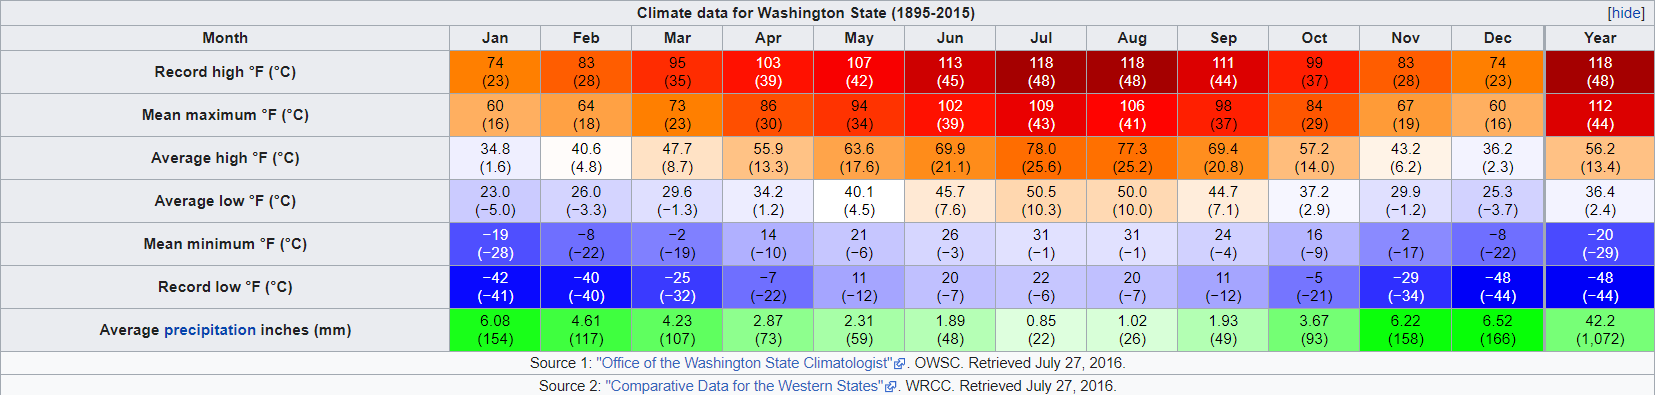

In [2]:
# The table to parse is the 'Climate data for Washington State (1895-2015)' table
# Display an image of the original data
from IPython.display import Image
Image("WashingtonStateClimateData.png")

<h3 style="color:coral">Identifying table to scrape from html</h3>

In [12]:
# get the 'wikitable collapsible' table, store it in variable
table = soup.find('table', class_='wikitable collapsible')

# print contents of the table
print(table.prettify())

<table class="wikitable collapsible" style="width:100%; text-align:center; line-height: 1.2em; margin:auto;">
 <tbody>
  <tr>
   <th colspan="14">
    Climate data for Washington State (1895-2015)
   </th>
  </tr>
  <tr>
   <th scope="row">
    Month
   </th>
   <th scope="col">
    Jan
   </th>
   <th scope="col">
    Feb
   </th>
   <th scope="col">
    Mar
   </th>
   <th scope="col">
    Apr
   </th>
   <th scope="col">
    May
   </th>
   <th scope="col">
    Jun
   </th>
   <th scope="col">
    Jul
   </th>
   <th scope="col">
    Aug
   </th>
   <th scope="col">
    Sep
   </th>
   <th scope="col">
    Oct
   </th>
   <th scope="col">
    Nov
   </th>
   <th scope="col">
    Dec
   </th>
   <th scope="col" style="border-left-width:medium">
    Year
   </th>
  </tr>
  <tr style="text-align: center;">
   <th scope="row" style="height: 16px;">
    Record high °F (°C)
   </th>
   <td style="background: #FF7F00; color:#000000;">
    74
    <br/>
    (23)
   </td>
   <td style="backgr

<h3 style="color:coral">Printing scraped data to validate</h3>

In [11]:
# get the rows of the table by identifying 'tr' elements
rows = table.findAll('tr')

# iterate over rows to identify number of columns in each by identifying 'td' elements
for row in rows:
    column=row.find_all('td')
    print("Number of Columns:", len(column))

# iterate over rows to print contents of the cells
for row in rows:
    row_titles=row.find_all('th')
    column=row.find_all('td')
    print()
    print("Row", rows.index(row))
    for title in row_titles:
        print(title.get_text(' ', strip=True))
    for cell in column:
        print(cell.get_text(' ', strip=True))

Number of Columns: 0
Number of Columns: 0
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 13
Number of Columns: 1
Number of Columns: 1

Row 0
Climate data for Washington State (1895-2015)

Row 1
Month
Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec
Year

Row 2
Record high °F (°C)
74 (23)
83 (28)
95 (35)
103 (39)
107 (42)
113 (45)
118 (48)
118 (48)
111 (44)
99 (37)
83 (28)
74 (23)
118 (48)

Row 3
Mean maximum °F (°C)
60 (16)
64 (18)
73 (23)
86 (30)
94 (34)
102 (39)
109 (43)
106 (41)
98 (37)
84 (29)
67 (19)
60 (16)
112 (44)

Row 4
Average high °F (°C)
34.8 (1.6)
40.6 (4.8)
47.7 (8.7)
55.9 (13.3)
63.6 (17.6)
69.9 (21.1)
78.0 (25.6)
77.3 (25.2)
69.4 (20.8)
57.2 (14.0)
43.2 (6.2)
36.2 (2.3)
56.2 (13.4)

Row 5
Average low °F (°C)
23.0 (−5.0)
26.0 (−3.3)
29.6 (−1.3)
34.2 (1.2)
40.1 (4.5)
45.7 (7.6)
50.5 (10.3)
50.0 (10.0)
44.7 (7.1)
37.2 (2.9)
29.9 (−1.2)
25.3 (−3.7)
36.4 (2.4)

Row 6
Mean m

<h3 style="color:coral">Prepping and cleaning data</h3>

In [10]:
# import regex library for operations to clean data
import re

# initialize empty lists to store data
periods = []
record_high_f = []
mean_maximum_f = []
average_high_f = []
average_low_f = []
mean_minumum_f = []
record_low_f = []
average_precipitation_in = []
record_high_c = []
mean_maximum_c = []
average_high_c = []
average_low_c = []
mean_minumum_c = []
record_low_c = []
average_precipitation_mm = []

# iterate over rows in table to sort data as needed
for row in rows:
    # pull out title information
    row_titles=row.find_all('th')
    # row 0 contains the title of the entire table
    if rows.index(row) == 0:
        for title in row_titles:
            table_title = title.get_text(' ', strip=True)
    # row 1 contains months and 'year' periods that are headers for data values
    elif rows.index(row) == 1:
        for title in row_titles:
            if row_titles.index(title) != 0:
                periods.append(title.get_text(' ', strip=True))
    # rows 2-8 contain data we want to get at in the columns and cells
    elif rows.index(row) <= 8:
        column=row.find_all('td')
        for cell in column:
            # get text from cell which contains both imperial and metric data -- metric in ( )
            temp_combined = cell.get_text(' ', strip=True)
            # split the data text on space character accordingly
            imperial, metric = temp_combined.split(' ')
            # remove metric value's parentheses
            metric = re.sub(r'[()]', '', metric)
            # clean up messy characters in both imperial and metric values to prep for float conversion
            imperial = imperial.replace(' ','').replace(',','').replace("−", "-")
            metric = metric.replace(' ','').replace(',','').replace("−", "-")
            # convert string data to float values
            imperial = float(imperial)
            metric = float(metric)
            # store imperial and metric values in appropriate lists, dependent on row
            if rows.index(row) == 2:
                record_high_f.append(imperial)
                record_high_c.append(metric)
            elif rows.index(row) == 3:
                mean_maximum_f.append(imperial)
                mean_maximum_c.append(metric)
            elif rows.index(row) == 4:
                average_high_f.append(imperial)
                average_high_c.append(metric)
            elif rows.index(row) == 5:
                average_low_f.append(imperial)
                average_low_c.append(metric)
            elif rows.index(row) == 6:
                mean_minumum_f.append(imperial)
                mean_minumum_c.append(metric)
            elif rows.index(row) == 7:
                record_low_f.append(imperial)
                record_low_c.append(metric)
            elif rows.index(row) == 8:
                average_precipitation_in.append(imperial)
                average_precipitation_mm.append(metric)
        
# TESTING PRINTS
# print(table_title)
# print(periods)
# print()

# print(record_high_f)
# print(record_high_c)
# print(mean_maximum_f)
# print(mean_maximum_c)
# print(average_high_f)
# print(average_high_c)
# print(average_low_f)
# print(average_low_c)
# print(mean_minumum_f)
# print(mean_minumum_c)
# print(record_low_f)
# print(record_low_c)
# print(average_precipitation_in)
# print(average_precipitation_mm)

<h3 style="color:coral">Pandas DataFrame assignment and printing to view data</h3>

In [14]:
# import pandas
import pandas as pd

# setup Dataframe df to store list data
df = pd.DataFrame(periods,columns=['Month'])
df['Record High °F'] = record_high_f
df['Record High °C'] = record_high_c
df['Mean Maximum °F'] = mean_maximum_f
df['Mean Maximum °C'] = mean_maximum_c
df['Average High °F'] = average_high_f
df['Average High °C'] = average_high_c
df['Average Low °F'] = average_low_f
df['Average Low °C'] = average_low_c
df['Mean Minimum °F'] = mean_minumum_f
df['Mean Minimum °C'] = mean_minumum_c
df['Record Low °F'] = record_low_f
df['Record Low °C'] = record_low_c
df['Average Precipitation (in)'] = average_precipitation_in
df['Average Precipitation (mm)'] = average_precipitation_mm

months_only = df.drop([12])

# display DataFrame df
months_only

,Month,Record High °F,Record High °C,Mean Maximum °F,Mean Maximum °C,Average High °F,Average High °C,Average Low °F,Average Low °C,Mean Minimum °F,Mean Minimum °C,Record Low °F,Record Low °C,Average Precipitation (in),Average Precipitation (mm)
0,Jan,74.0,23.0,60.0,16.0,34.8,1.6,23.0,-5.0,-19.0,-28.0,-42.0,-41.0,6.08,154.0
1,Feb,83.0,28.0,64.0,18.0,40.6,4.8,26.0,-3.3,-8.0,-22.0,-40.0,-40.0,4.61,117.0
2,Mar,95.0,35.0,73.0,23.0,47.7,8.7,29.6,-1.3,-2.0,-19.0,-25.0,-32.0,4.23,107.0
3,Apr,103.0,39.0,86.0,30.0,55.9,13.3,34.2,1.2,14.0,-10.0,-7.0,-22.0,2.87,73.0
4,May,107.0,42.0,94.0,34.0,63.6,17.6,40.1,4.5,21.0,-6.0,11.0,-12.0,2.31,59.0
5,Jun,113.0,45.0,102.0,39.0,69.9,21.1,45.7,7.6,26.0,-3.0,20.0,-7.0,1.89,48.0
6,Jul,118.0,48.0,109.0,43.0,78.0,25.6,50.5,10.3,31.0,-1.0,22.0,-6.0,0.85,22.0
7,Aug,118.0,48.0,106.0,41.0,77.3,25.2,50.0,10.0,31.0,-1.0,20.0,-7.0,1.02,26.0
8,Sep,111.0,44.0,98.0,37.0,69.4,20.8,44.7,7.1,24.0,-4.0,11.0,-12.0,1.93,49.0
9,Oct,99.0,37.0,84.0,29.0,57.2,14.0,37.2,2.9,16.0,-9.0,-5.0,-21.0,3.67,93.0


<h2 style="color:tomato">Data Visualizations</h2>

<h3 style="color:coral">Precipitation Visualization</h3>

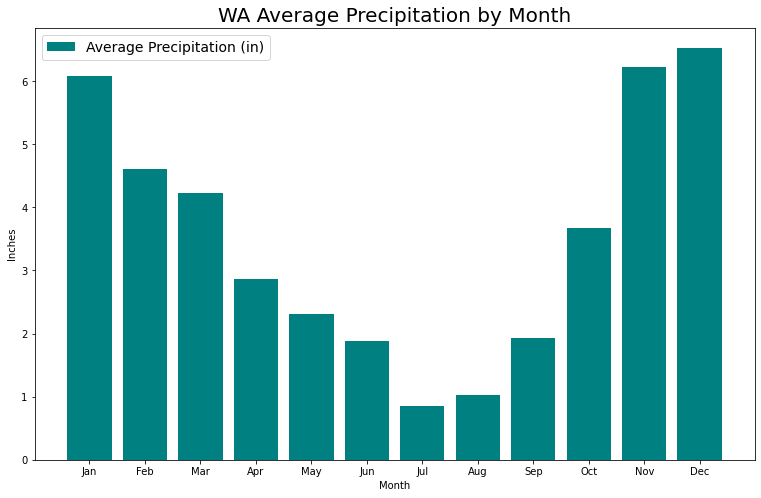

In [27]:
from matplotlib import pyplot as plt

# figure setup
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.bar(range(0,len(months_only["Average Precipitation (in)"])), 
        months_only["Average Precipitation (in)"],
        label="Average Precipitation (in)",
        linewidth=5,
        color='teal')

# unneeded line plot
# ax.plot(df["Average Precipitation (in)"], label="Average Precipitation (in)", linestyle="-.")

# xticks setup
xtick_range = range(0,len(months_only))
xtick_labels = periods
plt.xticks(ticks=xtick_range, labels=xtick_labels)

# title and legend
plt.title("WA Average Precipitation by Month", fontsize = 20)
plt.legend(loc="upper left", fontsize=14)

# axis labels
plt.xlabel("Month")
plt.ylabel("Inches")

# display plot
plt.show()

<h3 style="color:coral">Farenheit Temperature Visualizations</h3>

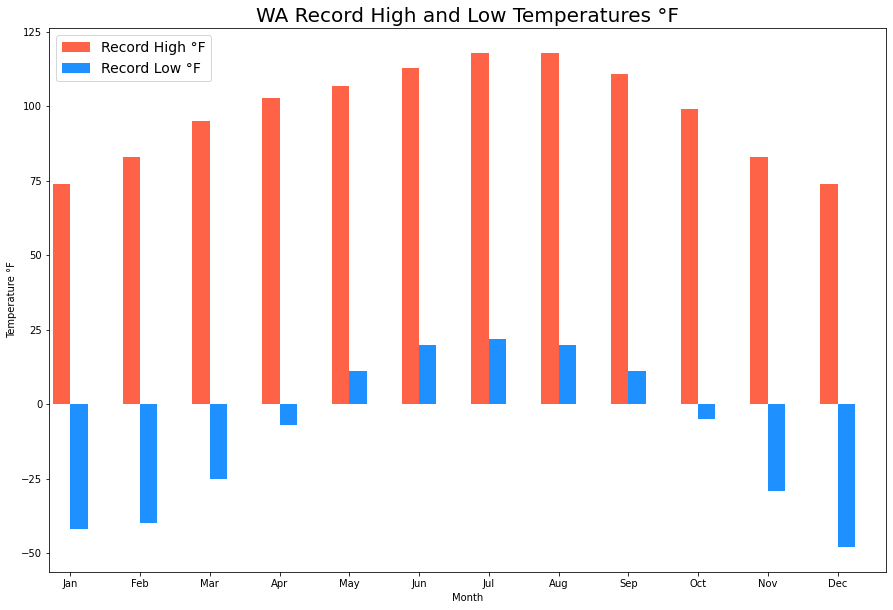

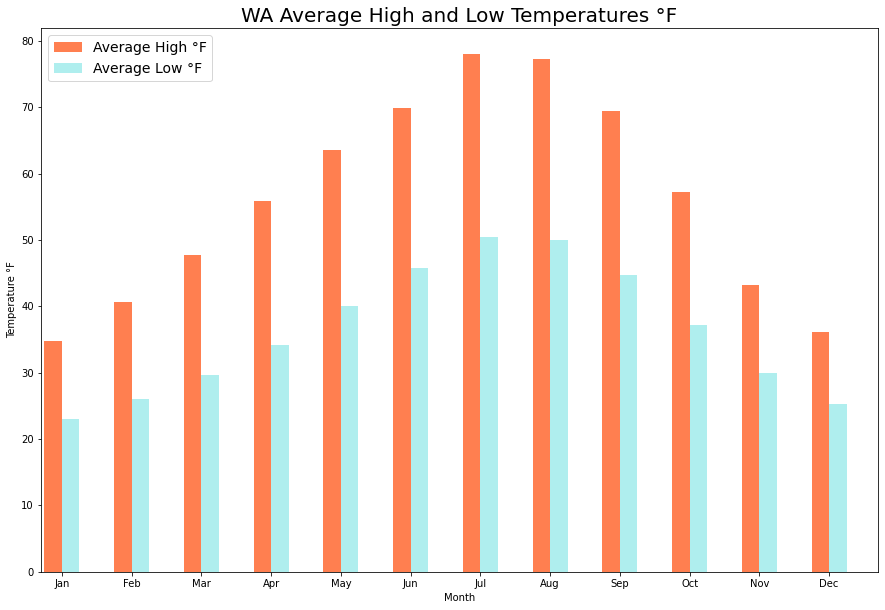

In [29]:
# RECORD HIGH AND LOW TEMPS
weight = .30

# setup plot
months_only[["Record High °F", "Record Low °F"]].plot(kind="bar", color = ["tomato", "dodgerblue"], figsize=(15,10))

# setup xticks
plt.xticks(range(0,len(months_only["Record High °F"])),months_only["Month"], rotation = 0)

# title and legend
plt.title("WA Record High and Low Temperatures °F", fontsize = 20)
plt.legend(loc="upper left", fontsize=14)

# axis labels, formatting
plt.xlabel("Month")
plt.ylabel("Temperature °F")
plt.xlim(-weight, len(months_only["Record High °F"])-weight)

# display plot
plt.show()

# AVERAGE HIGH AND LOW TEMPS

# setup plot
months_only[["Average High °F", "Average Low °F"]].plot(kind="bar", color = ["coral", "paleturquoise"], figsize=(15,10))

# setup xticks
plt.xticks(range(0,len(months_only["Record High °F"])),months_only["Month"], rotation = 0)

# title and legend
plt.title("WA Average High and Low Temperatures °F", fontsize = 20)
plt.legend(loc="upper left", fontsize=14)

# axis labels, formatting
plt.xlabel("Month")
plt.ylabel("Temperature °F")
plt.xlim(-weight, len(months_only["Record High °F"])-weight)

# display plot
plt.show()

<h3 style="color:coral">Celsius Temperature Visualizations</h3>

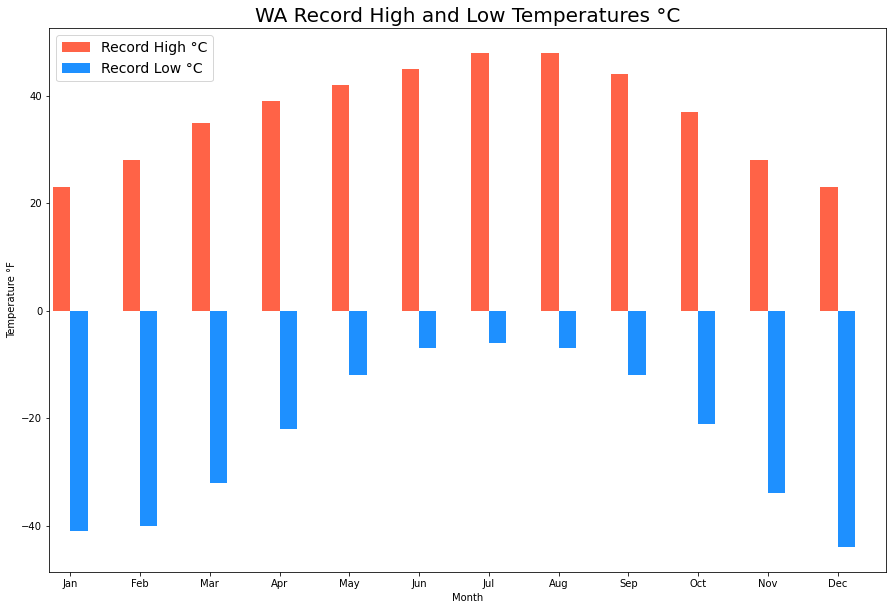

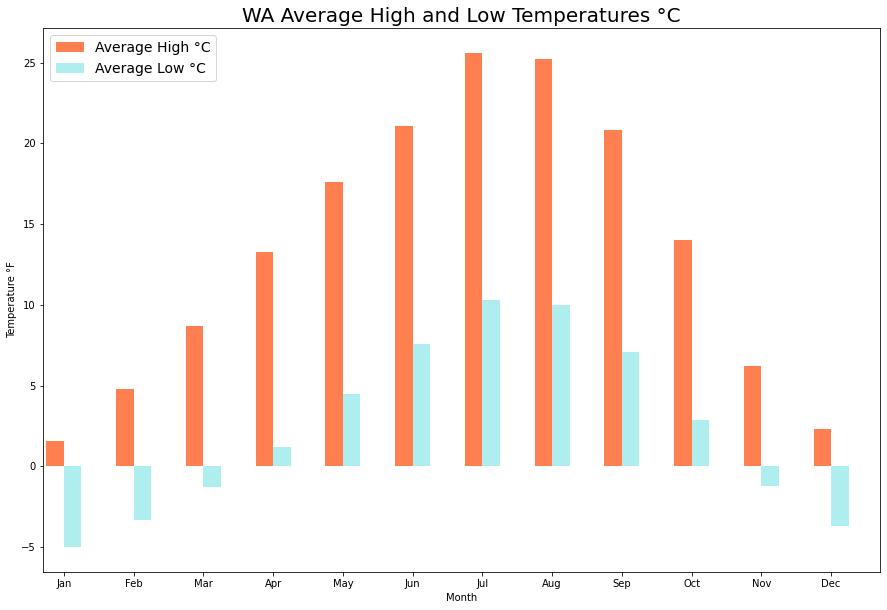

In [30]:
# RECORD HIGH AND LOW TEMPS
weight = .30

# setup plot
months_only[["Record High °C", "Record Low °C"]].plot(kind="bar", color = ["tomato", "dodgerblue"], figsize=(15,10))

# setup xticks
plt.xticks(range(0,len(months_only["Record High °C"])),months_only["Month"], rotation = 0)

# title and legend
plt.title("WA Record High and Low Temperatures °C", fontsize = 20)
plt.legend(loc="upper left", fontsize=14)

# axis labels, formatting
plt.xlabel("Month")
plt.ylabel("Temperature °C")
plt.xlim(-weight, len(months_only["Record High °C"])-weight)

# display plot
plt.show()

# AVERAGE HIGH AND LOW TEMPS

# setup plot
months_only[["Average High °C", "Average Low °C"]].plot(kind="bar", color = ["coral", "paleturquoise"], figsize=(15,10))

# setup xticks
plt.xticks(range(0,len(months_only["Record High °C"])),months_only["Month"], rotation = 0)

# title and legend
plt.title("WA Average High and Low Temperatures °C", fontsize = 20)
plt.legend(loc="upper left", fontsize=14)

# axis labels, formatting
plt.xlabel("Month")
plt.ylabel("Temperature °C")
plt.xlim(-weight, len(months_only["Record High °C"])-weight)

# display plot
plt.show()